Neural Network Classification using MLP Classifier in sklearn

We will predict the ocean proximity (`ocean_proximity` column) of Californian districts, given a number of features from these districts.

**The unit of analysis is a DISTRICT**

In [1]:
# Common imports
import numpy as np
import pandas as pd

# Get the data

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#Drop the missing values
housing.dropna(axis=0, inplace=True)

# pandas specific issue - why you might want to reset the index
# housing.reset_index(inplace=True, drop=True)

housing.describe()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Prepare the data for Machine Learning algorithms

In [6]:
#Set the training and test data sets
housing_X = housing.drop("ocean_proximity", axis=1) # drop labels 
#Select the label
housing_target = housing["ocean_proximity"]
housing_target.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

### Standardize the data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_X_std = scaler.fit_transform(housing_X)

In [9]:
housing_X_std

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97683327,
         2.34516291,  2.12881864],
       [-1.32232256,  1.04235526, -0.60621017, ...,  1.67037262,
         2.33263161,  1.31362603],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.84342665,
         1.78293943,  1.25818254],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.17377773,
        -1.14317103, -0.99247676],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.39350628,
        -1.05513604, -1.05831591],
       [-0.83318561,  1.74918635, -1.00330353, ...,  0.07995643,
        -0.78060586, -1.01759959]])

In [45]:
housing_X_std.shape
type(housing_target)

pandas.core.series.Series

# Split data (train/test)

In [11]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(housing_X_std, housing_target, test_size=0.3)

In [12]:
train_x.shape, test_x.shape

((14303, 9), (6130, 9))

# Multiclass classification



In [13]:
from sklearn.neural_network import MLPClassifier

#Default settings create 1 hidden layer with 100 neurons
#look at MLPClassifier documentation in sklearn to see which parameters can be modified
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,))

mlp_clf.fit(train_x, train_y)

/Users/bp/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Increase maximum iterations for convergence

In [14]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, verbose=True)

mlp_clf.fit(train_x, train_y)

# default loss function is cross-entropy or log-loss 
# classifier predicts a probability (0-1), while the actual is 0 or 1 see doc below
# https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

Iteration 1, loss = 1.23861184
Iteration 2, loss = 0.87903884
Iteration 3, loss = 0.76126467
Iteration 4, loss = 0.68942403
Iteration 5, loss = 0.63808049
Iteration 6, loss = 0.59947966
Iteration 7, loss = 0.56672548
Iteration 8, loss = 0.53770058
Iteration 9, loss = 0.51218707
Iteration 10, loss = 0.49009063
Iteration 11, loss = 0.47019942
Iteration 12, loss = 0.45331776
Iteration 13, loss = 0.43806849
Iteration 14, loss = 0.42308956
Iteration 15, loss = 0.41097041
Iteration 16, loss = 0.39960711
Iteration 17, loss = 0.39001973
Iteration 18, loss = 0.38245169
Iteration 19, loss = 0.37402374
Iteration 20, loss = 0.36620794
Iteration 21, loss = 0.36052631
Iteration 22, loss = 0.35315666
Iteration 23, loss = 0.34646159
Iteration 24, loss = 0.34195153
Iteration 25, loss = 0.33560149
Iteration 26, loss = 0.33157849
Iteration 27, loss = 0.32610294
Iteration 28, loss = 0.32184937
Iteration 29, loss = 0.31718464
Iteration 30, loss = 0.31354321
Iteration 31, loss = 0.31034364
Iteration 32, los

Iteration 253, loss = 0.16802667
Iteration 254, loss = 0.16940432
Iteration 255, loss = 0.16838774
Iteration 256, loss = 0.16864312
Iteration 257, loss = 0.16821733
Iteration 258, loss = 0.16852126
Iteration 259, loss = 0.16882121
Iteration 260, loss = 0.16727942
Iteration 261, loss = 0.16815847
Iteration 262, loss = 0.16790269
Iteration 263, loss = 0.16655166
Iteration 264, loss = 0.16784392
Iteration 265, loss = 0.16708271
Iteration 266, loss = 0.16604344
Iteration 267, loss = 0.16693701
Iteration 268, loss = 0.16662961
Iteration 269, loss = 0.16597191
Iteration 270, loss = 0.16607054
Iteration 271, loss = 0.16514548
Iteration 272, loss = 0.16547627
Iteration 273, loss = 0.16593260
Iteration 274, loss = 0.16477371
Iteration 275, loss = 0.16315331
Iteration 276, loss = 0.16507616
Iteration 277, loss = 0.16371813
Iteration 278, loss = 0.16486294
Iteration 279, loss = 0.16464084
Iteration 280, loss = 0.16494452
Iteration 281, loss = 0.16298799
Iteration 282, loss = 0.16590439
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

# Classification Matrix

In [15]:
test_y_pred = mlp_clf.predict(test_x)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_pred)

array([[2514,   56,    0,   22,  105],
       [  51, 1887,    0,    8,    0],
       [   0,    0,    0,    0,    1],
       [  27,   14,    0,  588,   17],
       [ 117,    0,    0,   13,  710]])

In [17]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_y, test_y_pred))

0.9296900489396411


# Change the number of neurons

In [18]:
#Increase neurons from 100 to 200
mlp_clf = MLPClassifier(max_iter=1000, verbose=True,
                        hidden_layer_sizes=(200,))

mlp_clf.fit(train_x, train_y)

Iteration 1, loss = 1.12854760
Iteration 2, loss = 0.77399832
Iteration 3, loss = 0.67038908
Iteration 4, loss = 0.60814202
Iteration 5, loss = 0.56114792
Iteration 6, loss = 0.52491431
Iteration 7, loss = 0.49265161
Iteration 8, loss = 0.46366996
Iteration 9, loss = 0.44012949
Iteration 10, loss = 0.41860469
Iteration 11, loss = 0.40049457
Iteration 12, loss = 0.38586595
Iteration 13, loss = 0.37177235
Iteration 14, loss = 0.35997851
Iteration 15, loss = 0.34785978
Iteration 16, loss = 0.33944618
Iteration 17, loss = 0.33106611
Iteration 18, loss = 0.32400551
Iteration 19, loss = 0.31716916
Iteration 20, loss = 0.30915972
Iteration 21, loss = 0.30481968
Iteration 22, loss = 0.30005806
Iteration 23, loss = 0.29439003
Iteration 24, loss = 0.29073462
Iteration 25, loss = 0.28578385
Iteration 26, loss = 0.28256845
Iteration 27, loss = 0.27924316
Iteration 28, loss = 0.27550826
Iteration 29, loss = 0.27180245
Iteration 30, loss = 0.27072390
Iteration 31, loss = 0.26793308
Iteration 32, los

Iteration 253, loss = 0.15063938
Iteration 254, loss = 0.14973490
Iteration 255, loss = 0.15096268
Iteration 256, loss = 0.15078043
Iteration 257, loss = 0.15002422
Iteration 258, loss = 0.14970016
Iteration 259, loss = 0.14956942
Iteration 260, loss = 0.14918171
Iteration 261, loss = 0.15003590
Iteration 262, loss = 0.14881563
Iteration 263, loss = 0.14763150
Iteration 264, loss = 0.14739326
Iteration 265, loss = 0.14814241
Iteration 266, loss = 0.14746554
Iteration 267, loss = 0.14766647
Iteration 268, loss = 0.14742928
Iteration 269, loss = 0.14686761
Iteration 270, loss = 0.14812879
Iteration 271, loss = 0.14684088
Iteration 272, loss = 0.14782916
Iteration 273, loss = 0.14779705
Iteration 274, loss = 0.14895877
Iteration 275, loss = 0.14694685
Iteration 276, loss = 0.14725432
Iteration 277, loss = 0.14502272
Iteration 278, loss = 0.14680433
Iteration 279, loss = 0.14499509
Iteration 280, loss = 0.14553298
Iteration 281, loss = 0.14542675
Iteration 282, loss = 0.14703198
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [19]:
test_y_pred = mlp_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9270799347471452


# Deep Neural Network

In [20]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000)

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
#Let's check the number of iterations:
dnn_clf.n_iter_

280

In [22]:
#Let's check the number of layers:
dnn_clf.n_layers_

5

In [23]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))


0.9424143556280588


# Deeper Neural Network

In [24]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(100,80,60,40,20,10),
                       max_iter=1000)

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 80, 60, 40, 20, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=1000,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='adam',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [25]:
#Let's check the number of iterations:
dnn_clf.n_iter_

101

In [26]:
#Let's check the number of layers:
dnn_clf.n_layers_

8

In [27]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9430668841761827


## Early stopping

In [28]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       early_stopping=True)

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
#Let's check the number of iterations:
dnn_clf.n_iter_

56

In [30]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))


0.9057096247960849


## Activation function

In [31]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       activation = 'tanh')

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9419249592169657


## Solver (Optimizer)

In [33]:
#Let's use Stochastic Gradient Descent optimizer

dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       activation = 'tanh',
                       solver='sgd')

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [34]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.935562805872757


## Prediction probabilities

In [35]:
#Select a random observation

random = test_x[50:51]
random

array([[ 0.62424286, -0.88621699, -0.36795414,  1.58359431,  0.60784241,
         0.72632106,  0.80192168,  3.29843656,  2.53945568]])

In [36]:
# Observe the input variables of the observation
dnn_clf.predict_proba(random)

array([[9.19219599e-02, 2.44832585e-06, 3.21519363e-04, 3.33386580e-06,
        9.07750739e-01]])

In [37]:
# Round the probability values
np.round(dnn_clf.predict_proba(random))

array([[0., 0., 0., 0., 1.]])

# Learning Curve

In [38]:
from matplotlib import pyplot as plt

In [42]:
plt.plot(dnn_clf.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

No handles with labels found to put in legend.


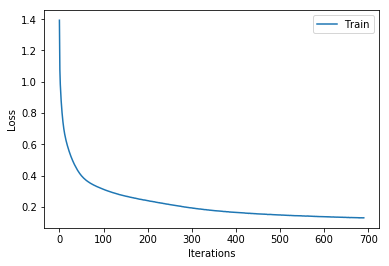

In [40]:
plt.show()